# Importing Necessary Libraries 

In [36]:
from numpy import random
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
from wordcloud import WordCloud # data visualization library
#text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #tfidf and Bag-of-Words Features.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
import gensim # library for word2vec
%matplotlib inline
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Importing Data

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testComplete.csv')

In [38]:
train

,UID,Handle,Name,Description,Location,Followers_count,Following_count,HCP_flag
0,4778,oncoblogbulbul,Oncoblog,Oncólogo médico. Músico. Lector empedernido. Protestón por naturaleza. Appleadicto.,NaN,1133,592,1
1,6542,ritrattosalute,Ritrattodellasalute,"Il ritratto della salute è il primo progetto italiano sulla medicina dei sani, con le principali Società scientifiche del Paese, Presidenza del Consiglio e CONI",NaN,700,903,0
2,13355,juan3punto14,juan 3.14,NaN,Earth,1999,1318,0
3,1764,rachaeyyy,Rachael Morrison,USCA '18,NaN,408,306,0
4,14082,allahbas9,علاء الشمري,‏‏‏‏گسرتٌ آلُدِنْيَآ گآہلُيَ فَآفَقَدِتٌنْيَ (عبْدِآلُلُہ)َ,NaN,1442,1441,0
5,10929,stephrstarr,Stephanie Starr MD,General pediatrician & medical educator (UME health care delivery and improvement). All tweets are my own; follow does not = endorsement.,"Rochester, Minnesota",96,159,1
6,14632,penny_donnely,Penny Donnely,"The OFFICIAL Twitter page of Actor, Producer, Director - Tyler Perry","San Diego, CA",1,34,0
7,875,karenychin,Karen,NaN,NaN,57,83,1
8,7390,joperezxx,J,.Mermaid.,Fearfully & Wonderfully Made,106,244,0
9,7011,maditini,Madi Tini,NaN,NaN,22,43,0


In [39]:
test.head()

,UID,Handle,Name,Description,Location,Followers_count,Following_count,HCP_flag
0,2922,jalivingston_md,"Andy Livingston, MD","Oncology fellow at The University of Texas MD Anderson Cancer Center. Pediatrician, internist, and clinical investigator. My focus: AYA oncology and sarcoma","Houston, TX",59,59,NaN
1,290,wibiworks,wibi+works,Wibi+Works Therapeutics is an emerging biotech company developing next generation cell based products to treat diseases associated w/ inflammation and cancer.,planet earth,457,502,NaN
2,1584,citelineannac,Anna Cauldwell,"Analyst in CNS, AI & Ophthalmology. Views expressed are my own","London, UK",162,167,NaN
3,2886,rwilliams_msk,Rebecca Williams,Media Associate @sloan_kettering. Views are my own.,"New York, NY",42,129,NaN
4,1987,jordixiol,Jordi Xiol,Biochemist - Biotech investing,NaN,50,79,NaN


In [40]:
train.shape,test.shape

((6709, 8), (1701, 8))

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 8 columns):
UID                6709 non-null int64
Handle             6709 non-null object
Name               6709 non-null object
Description        5273 non-null object
Location           4377 non-null object
Followers_count    6709 non-null int64
Following_count    6709 non-null int64
HCP_flag           6709 non-null int64
dtypes: int64(4), object(4)
memory usage: 419.4+ KB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 8 columns):
UID                1701 non-null int64
Handle             1701 non-null object
Name               1701 non-null object
Description        1701 non-null object
Location           1206 non-null object
Followers_count    1701 non-null int64
Following_count    1701 non-null int64
HCP_flag           0 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 106.4+ KB


# EDA

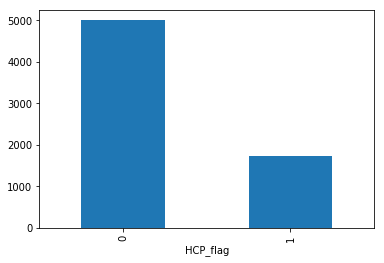

In [43]:
train.groupby('HCP_flag').size().plot(kind = 'bar')

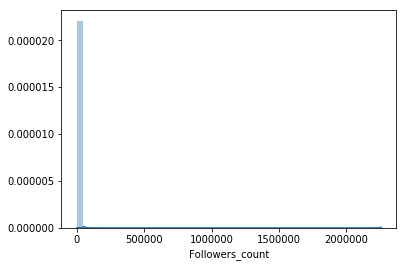

In [44]:
import seaborn as sns
sns.distplot(train['Followers_count'][train['HCP_flag']==1].dropna())

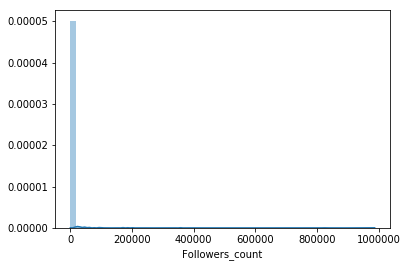

In [45]:
import seaborn as sns
sns.distplot(train['Followers_count'][train['HCP_flag']==0].dropna())

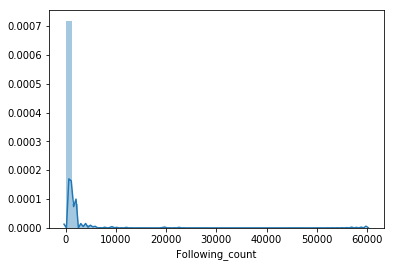

In [46]:
import seaborn as sns
sns.distplot(train['Following_count'][train['HCP_flag']==1].dropna())

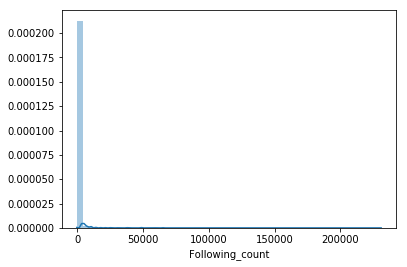

In [47]:
import seaborn as sns
sns.distplot(train['Following_count'][train['HCP_flag']==0].dropna())

# Text Preprocessing

In [48]:
combi = train.append(test, ignore_index=True,sort=True)
combi.shape

(8410, 8)

In [49]:
combi = combi.replace(np.nan, '', regex=True)

In [50]:
combi['Description'] = combi['Description'].str.replace("[^a-zA-Z0-9óéúèü]"," ")

In [51]:
combi['Description'] = combi['Description'].str.replace("[ó]","o")
combi['Description'] = combi['Description'].str.replace("[é]","e")
combi['Description'] = combi['Description'].str.replace("[ú]","u")
combi['Description'] = combi['Description'].str.replace("[è]","e")
combi['Description'] = combi['Description'].str.replace("[ü]","u")

In [52]:
combi['Followers_count'] = combi['Followers_count'].replace("[^0-9]","")
combi['Following_count'] = combi['Following_count'].replace("[^0-9]","")
combi['Location'] = combi['Location'].str.replace("[^a-zA-Z]"," ")
combi['Name'] = combi['Name'].str.replace("[^a-zA-Z]"," ")
combi['Name'] = combi['Name'].str.lower()
combi['Location'] = combi['Location'].str.lower()
combi['Handle'] = combi['Handle'].str.lower()

In [53]:
combi['Followers_count'] = combi['Followers_count'].astype(str)
combi['Following_count'] = combi['Following_count'].astype(str)

In [54]:
combi['Description'] = combi['Description']+" "+combi['Followers_count']+" "+combi['Following_count']

In [55]:
STOPWORDS1 = set(stopwords.words('english'))
STOPWORDS2 = set(stopwords.words('spanish'))
STOPWORDS3 = set(stopwords.words('italian'))
def clean_text(text):
    text = ' '.join(word for word in text.split() if word not in STOPWORDS1) # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS2)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS3)
    text = text.lower() 
    return text

def stemming(input_text):
    porter = PorterStemmer()
    words = input_text.split() 
    stemmed_words = [porter.stem(word) for word in words]
    return " ".join(stemmed_words)

def remove_urls(input_text):
     return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)

def remove_punctuation(input_text):
    # Make translation table
    punct = string.punctuation
    trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
    return input_text.translate(trantab)

In [56]:
from nltk.stem.porter import PorterStemmer

combi['Description'] = combi['Description'].apply(clean_text)
combi['Description'] = combi['Description'].apply(remove_urls)
combi['Description'] = combi['Description'].apply(remove_punctuation)
combi['Description'] = combi['Description'].apply(stemming)
combi['Description'] = combi['Description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [57]:
combi['Description'].apply(lambda x: len(x.split(' '))).sum()

80950

In [58]:
combi.columns = combi.columns.str.strip()

In [59]:
train_text = combi['Description'][:6709]
test_text = combi['Description'][6709:]
all_text = combi['Description']

# Feature Engineering

In [137]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',ngram_range=(1, 3),max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

In [138]:
char_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='char',ngram_range=(1, 15),max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
test_char_features = char_vectorizer.transform(test_text)

In [139]:
train_word_features1=train_word_features[:6000,:]
train_word_features2=train_word_features[6000:,:]
train_char_features1=train_char_features[:6000,:]
train_char_features2=train_char_features[6000:,:]
train_target1 = train['HCP_flag'][:6000]
train_target2 = train['HCP_flag'][6000:]

In [140]:
train_char_features1.shape,test_char_features.shape

((6000, 50000), (1701, 50000))

In [141]:
from scipy.sparse import hstack

In [142]:
train_features1 = hstack([train_char_features1, train_word_features1])
test_features = hstack([test_char_features, test_word_features])

In [143]:
train_features2 = hstack([train_char_features2, train_word_features2])

In [144]:
train_features1.shape,test_features.shape

((6000, 197935), (1701, 197935))

In [35]:
#print(np.array(train_features))

# Manual Model Selection

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
scores = []
classifierlreg = LogisticRegression(max_iter=300,C=1e5, solver='sag')

In [82]:
cv_score = cross_val_score(classifierlreg, train_features1, train_target1, cv=10, scoring='roc_auc',n_jobs=-1)

In [83]:
cv_score

array([0.93394024, 0.96590511, 0.94534168, 0.95006653, 0.93567136,
       0.9568876 , 0.95566668, 0.94879607, 0.9569572 , 0.94806017])

In [84]:
np.mean(cv_score)

0.9497292640686519

In [91]:
from sklearn.metrics import roc_auc_score

classifierlreg.fit(train_features1, train_target1)
pred1=classifierlreg.predict(train_features2)
roc_auc_score(pred1, train_target2,average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9100578273440728

# SVM

In [92]:
from sklearn import svm
scores = []
classifiersvm = svm.SVC(C=1e5)

In [93]:
cv_score = cross_val_score(classifiersvm, train_features1, train_target1, cv=10, scoring='roc_auc',n_jobs=-1)

In [94]:
cv_score

array([0.93417367, 0.96346872, 0.9477343 , 0.95414601, 0.94486848,
       0.9570192 , 0.96053574, 0.95556635, 0.95784028, 0.95418286])

In [95]:
np.mean(cv_score)

0.952953560945258

In [96]:
from sklearn.metrics import roc_auc_score

classifiersvm.fit(train_features1, train_target1)
pred1=classifiersvm.predict(train_features2)
roc_auc_score(pred1, train_target2,average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8933224053144682

# XGBoost

In [145]:
from xgboost import XGBClassifier
scores = []
classifierxgb = XGBClassifier(n_jobs=-1,n_estimators=300,random_state=42,class_weight="balanced")

In [146]:
cv_score = cross_val_score(classifierxgb, train_features1, train_target1, cv=10, scoring='roc_auc',n_jobs=-1)

In [147]:
cv_score

array([0.93842641, 0.96055818, 0.94734039, 0.94838502, 0.93807665,
       0.9484362 , 0.96283137, 0.957568  , 0.93242229, 0.95637584])

In [148]:
np.mean(cv_score)

0.9490420346751481

In [149]:
from sklearn.metrics import roc_auc_score

classifierxgb.fit(train_features1, train_target1)
pred1=classifierxgb.predict(train_features2)
roc_auc_score(pred1, train_target2,average='weighted')

0.9311493487100553

# Tpot Model Selection

In [54]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics
import timeit

In [55]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train['HCP_flag'], random_state=42, test_size=0.25, stratify=train['HCP_flag'])

In [56]:
# instantiate tpot 
tpot = TPOTClassifier(verbosity=3,  
                      random_state=25, 
                      n_jobs=-1, 
                      scoring='roc_auc',
                      config_dict='TPOT sparse',
                      generations=5, 
                      population_size=10,
                      early_stop = 5,
                      memory = None)
times = []
scores = []
winning_pipes = []
# run 1 iterations
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_ZS_datathon_scipy.py')
# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

13 operators have been imported by TPOT.


Skipped pipeline #1 due to time out. Continuing to the next pipeline.
Skipped pipeline #4 due to time out. Continuing to the next pipeline.
Skipped pipeline #8 due to time out. Continuing to the next pipeline.
Skipped pipeline #10 due to time out. Continuing to the next pipeline.
Skipped pipeline #12 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
Skipped pipeline #19 due to time out. Continuing

_pre_test decorator: _random_mutation_operator: num_test=0 No feature in X meets the variance threshold 0.30000.
_pre_test decorator: _random_mutation_operator: num_test=1 A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Skipped pipeline #55 due to time out. Continuing to the next pipeline.
Skipped pipeline #57 due to time out. Continuing to the next pipeline.
Skipped pipeline #62 due to time out. Continuing to the next pipeline.
Skipped pipeline #65 due to time out. Continuing to the next pipeline.
Generation 4 - Current Pareto front scores:
-1	0.9610471647977912	LinearSVC(input_matrix, LinearSVC__C=0.5, LinearSVC__dual=False, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l2, LinearSVC__tol=0.1)

_pre_test decorator: _random_mutation_operator: num_test=0 index 51 is out of bounds for axis 0

# Best Performing model - Linear SVC

In [119]:
from sklearn.svm import LinearSVC
scores = []
#train_target = train['HCP_flag']
classifierlinearsvc = LinearSVC(C=0.5, class_weight="balanced", dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.1,
     verbose=3)

In [120]:
cv_score = cross_val_score(classifierlinearsvc, train_features1, train_target1, cv=20, scoring='roc_auc',n_jobs=-1)

In [121]:
cv_score

array([0.93993506, 0.93419527, 0.958343  , 0.97538845, 0.94532699,
       0.95982143, 0.96266234, 0.96217105, 0.96105498, 0.9296875 ,
       0.96035009, 0.96049695, 0.97527021, 0.96424357, 0.9514397 ,
       0.96453859, 0.96046731, 0.95775313, 0.97238612, 0.94211706])

In [122]:
np.var(cv_score)

0.00015423298957959532

In [123]:
np.mean(cv_score)

0.956882440105591

In [124]:
from sklearn.metrics import roc_auc_score

classifierlinearsvc.fit(train_features1, train_target1)
pred1=classifierlinearsvc.predict(train_features2)
roc_auc_score(pred1, train_target2,average='weighted')

[LibLinear]

0.9120462080613883

In [157]:
submission = pd.DataFrame.from_dict({'UID': test['UID']})
classifierlinearsvc.fit(train_features, train_target)
submission['HCP_flag']=classifierlinearsvc.predict(test_features)
submission.to_csv('Krishna_Priya_18121995_LinearSVC.csv',index=False)

[LibLinear]

# As LinearSVC cant predict probablities, I will use linear kernel in svm.svc and turn probablities = True in the model made above but since all parameters are not available accuracy came out to be less

# So I will give you 1 more extra csv file with only 1 and 0 predicted for test set which will be solely based on LinearSVC model.

# and another will be usual probability prediction in the test data itself using SVM.svc with kernel set to linear but resulted in a little less accuracy. 

In [114]:
from sklearn import svm
scores = []
#train_target = train['HCP_flag']
classifiersvm = svm.SVC(kernel='linear',probability=True,C=0.5, class_weight="balanced",max_iter=1000, random_state=None, tol=0.1,
     verbose=3)

In [115]:
cv_score = cross_val_score(classifiersvm, train_features1, train_target1, cv=10, scoring='roc_auc',n_jobs=-1)

In [110]:
cv_score

array([0.94103058, 0.96556956, 0.95551033, 0.95423374, 0.94709099,
       0.96282406, 0.96221725, 0.95999647, 0.96291799, 0.95067997])

In [116]:
np.var(cv_score)

8.335922935002802e-05

In [117]:
np.mean(cv_score)

0.9553541342382748

In [118]:
from sklearn.metrics import roc_auc_score

classifiersvm.fit(train_features1, train_target1)
pred1=classifiersvm.predict(train_features2)
roc_auc_score(pred1, train_target2,average='weighted')

[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.8735266778211563

In [167]:
classifiersvm.fit(train_features, train_target)
test['HCP_flag']=classifiersvm.predict_proba(test_features)[:,1]

[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [168]:
test.to_csv('Krishna_Priya_18121995.csv',index=False)

In [174]:
test[test['UID']==437]

,UID,Handle,Name,Description,Location,Followers_count,Following_count,HCP_flag
46,437,vikasdandekar,Vikas Dandekar,Journalist - Covering Indian Pharma Industry. Tweets may be news or quick views; retweets are not endorsements.,Mumbai,2211,335,0.062034


In [175]:
test

,UID,Handle,Name,Description,Location,Followers_count,Following_count,HCP_flag
0,2922,jalivingston_md,"Andy Livingston, MD","Oncology fellow at The University of Texas MD Anderson Cancer Center. Pediatrician, internist, and clinical investigator. My focus: AYA oncology and sarcoma","Houston, TX",59,59,1.000000
1,290,wibiworks,wibi+works,Wibi+Works Therapeutics is an emerging biotech company developing next generation cell based products to treat diseases associated w/ inflammation and cancer.,planet earth,457,502,0.863207
2,1584,citelineannac,Anna Cauldwell,"Analyst in CNS, AI & Ophthalmology. Views expressed are my own","London, UK",162,167,0.087832
3,2886,rwilliams_msk,Rebecca Williams,Media Associate @sloan_kettering. Views are my own.,"New York, NY",42,129,0.094623
4,1987,jordixiol,Jordi Xiol,Biochemist - Biotech investing,NaN,50,79,0.242995
5,989,isa_mulas99,Isaaa.,//CACICAC//,NaN,287,224,0.012726
6,1066,ellenlicking,Ellen Licking,"Life Sciences Analyst, EY. Curious about the world, engaged, data-driven. Opinions are mine, not EY's.","Palo Alto, California",3142,737,0.228307
7,1271,inthenet,David Palomares,"Husband, Father, New Grandfather, Sysadmin, tech-geek, gamer, music-lover, optimistic-realist","Loris, SC",524,729,0.079235
8,1184,999hha,HH,0,NaN,210,191,0.019740
9,1620,ramonapest,Ramona Quimby,0,Usually Home,116,114,0.032257


# Journey

### Initially tried Bag of Words, Tfidf (word analyzer only) and word2vec wih no noise removal.

### then tried them after removing coumns which were noise according to intution and then my hypothesis was verified as the Roc_Auc score improved by 2%. So Location, Name and handle were of no use in this particular problem statement of classification.

### word2vec and Tfidf were almost performing similar upon tuning considering tuning limited to time restrictions.

### Then I tried this feature engineering wih noise removal where I stacked word and character tfidfvectorizer and the results were very good. Score improved by 4%.


# Conclusion

### Tpot tried various algorithms (13 total - see documentation for models) and their parameter tuning and finally suggested Linear SVC and the best parameters of the model.

### Instead of tuning each classification model and comparing, TPOT is a good idea considering you have good time at your hand.

### here as you can see I have only taken 60 pipelines but if I had time I would have taken more. As they have default pipeline size of 10000. But in the problems I have tried generally a pipeline size of 700-1000 which provides good scores and models incuding stacked and ensemble models. 

# Number of pipelines = (population size * generation) + population size

# Best Performing model : LinearSVC
# roc_auc score: 95.8746 %
# variance: 0.0000145 on 5 fold cross validation.

# so the model is not overfitting.